**Name:** PRIYADHARSHINI RAMESH

**Task:** 1

**Title:**Iris Flower Classification

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [65]:
file  = pd.read_csv('/content/Iris.csv')
file

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [66]:
file = file.drop(['Id'], axis = 1)

In [67]:
file.shape

(150, 5)

In [68]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
file.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [70]:
file.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**CORRELATION:**

In [71]:
x = file.corr()
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


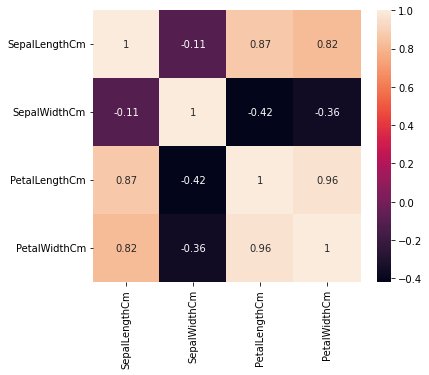

In [72]:
plt.figure(figsize = (6,5))
sb.heatmap(x, annot = True)

**From this heatmap,**

*   Petal Length and Petal Width are positively correlated.
*   Sepal Length and Sepal Width are negatively correlated.


**DISTRIBUTION AND RELATIONSHIP BETWEEN THE SPECIES:**

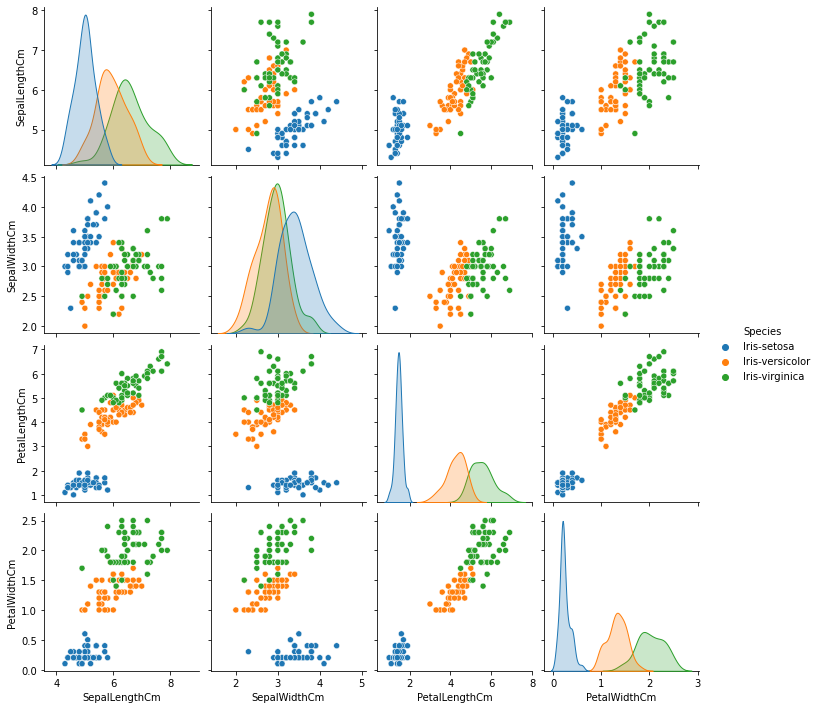

In [73]:
sb.pairplot(file, hue = 'Species')

**From this pairplot, Iris-setosa is a isolated cluster while Iris-versicolor and Iris-virginica overlap each other.**

**SPECIES TYPES:**

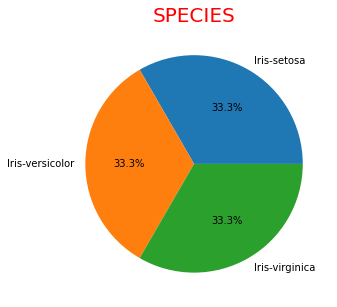

In [74]:
a = file['Species'].value_counts().plot(kind = 'pie', figsize = (8,5), autopct = "%1.1f%%")
plt.title('SPECIES', size = 20, color='r')
a.yaxis.set_visible(False)

***Checking for Outliers:***

**Barplot:**

Text(0.5, 1.0, 'PetalWidthCm')

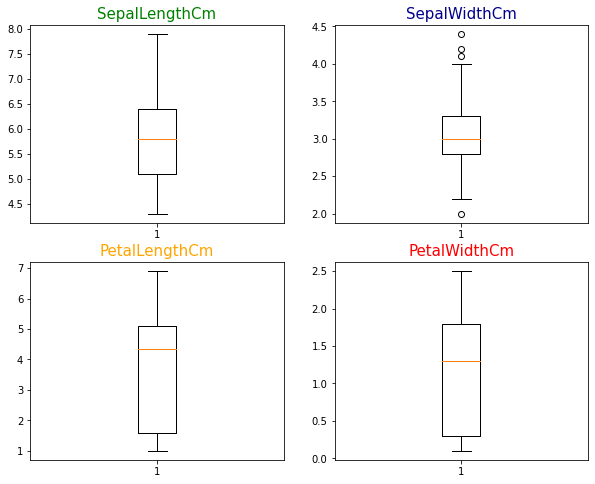

In [75]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.boxplot(x = 'SepalLengthCm', data = file)
plt.title('SepalLengthCm', size = 15, color='g')
plt.subplot(2,2,2)
plt.boxplot(x = 'SepalWidthCm', data = file)
plt.title('SepalWidthCm', size = 15, color='darkblue')
plt.subplot(2,2,3)
plt.boxplot(x = 'PetalLengthCm', data = file)
plt.title('PetalLengthCm', size = 15, color='orange')
plt.subplot(2,2,4)
plt.boxplot(x = 'PetalWidthCm', data = file)
plt.title('PetalWidthCm', size = 15, color='r')

**Histogram:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef9c4af190>,
      dtype=object)

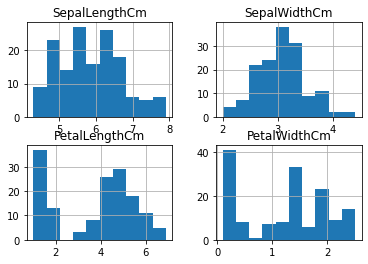

In [76]:
file.hist()

**Violin Plot:**

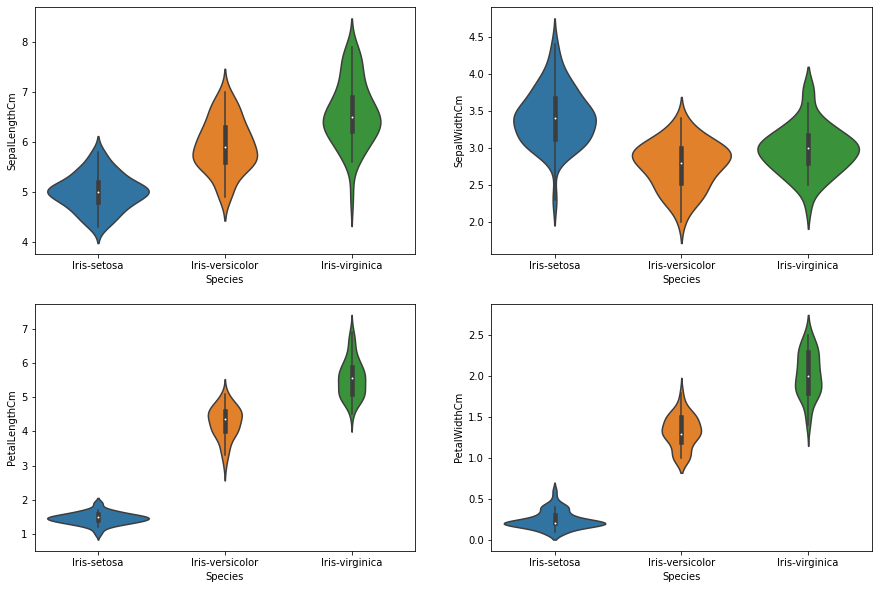

In [77]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sb.violinplot(x= 'Species', y = 'SepalLengthCm', data = file)
plt.subplot(2,2,2)
sb.violinplot(x= 'Species', y = 'SepalWidthCm', data = file)
plt.subplot(2,2,3)
sb.violinplot(x= 'Species', y = 'PetalLengthCm', data = file)
plt.subplot(2,2,4)
sb.violinplot(x= 'Species', y = 'PetalWidthCm', data = file)
plt.show()

**Split the data for train and test set:**




In [78]:
from sklearn.model_selection import train_test_split

In [79]:
train,test=train_test_split(file, train_size=0.8,test_size=0.2)

In [80]:
train.shape

(120, 5)

In [81]:
test.shape

(30, 5)

In [167]:
train_x=train.drop("Species",axis=1)
train_y=train["Species"]

In [168]:
train_x.shape

(112, 4)

In [169]:
train_y.shape

(112,)

In [170]:
test_x=test.drop("Species",axis=1)
test_y=test["Species"]

In [171]:
test_x.shape

(38, 4)

In [172]:
test_y.shape

(38,)

# **k-Nearest-Neighbors:**

In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(train_x,train_y)
y_pred = knc.predict(test_x)
accuracy_score(test_y,y_pred)

1.0

# **Decision Tree Algorithm:**

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy')

**Predicting the test set result:**

In [90]:
pred_y = dtree.predict(test_x)

**Classification Report:**

In [91]:
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
classification_report(test_y, pred_y)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00         6\nIris-versicolor       0.90      0.82      0.86        11\n Iris-virginica       0.86      0.92      0.89        13\n\n       accuracy                           0.90        30\n      macro avg       0.92      0.91      0.92        30\n   weighted avg       0.90      0.90      0.90        30\n'

In [93]:
import sklearn.metrics as sm

In [94]:
sm.accuracy_score(test_y, pred_y)

0.9

**Test accuracy of the result: (CONFUSION MATRIX)**

In [95]:
cm= confusion_matrix(test_y, pred_y)
cm

array([[ 6,  0,  0],
       [ 0,  9,  2],
       [ 0,  1, 12]])

**Visualizing the test result:**

In [96]:
from sklearn.tree import plot_tree

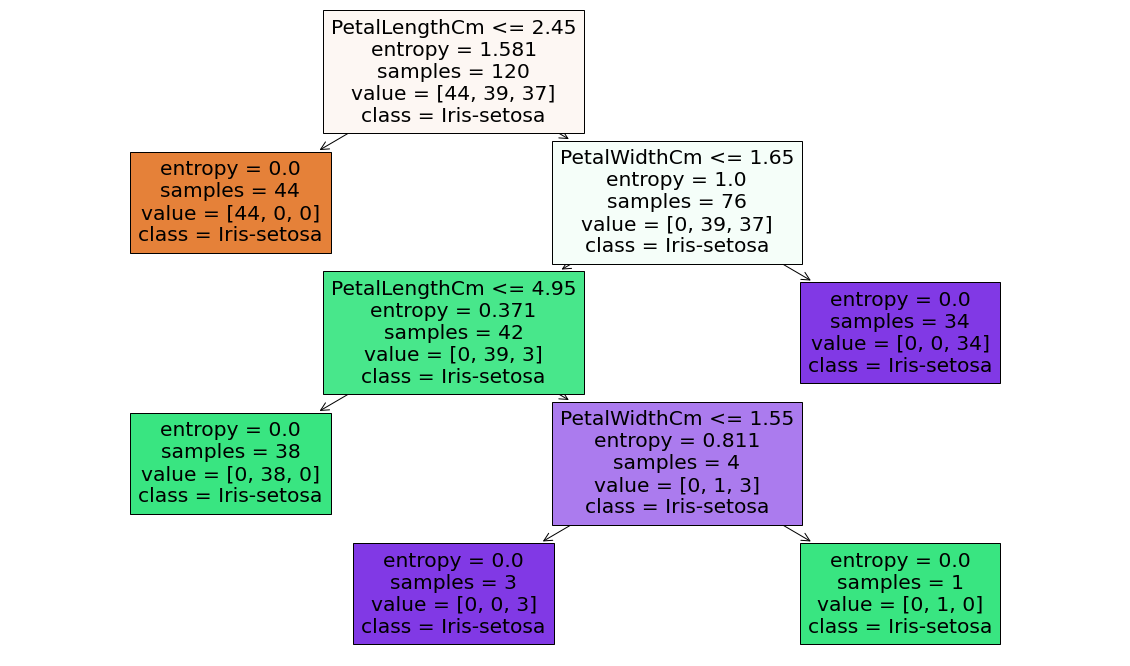

In [97]:
plt.figure(figsize = (20,12))
tree=plot_tree(dtree,feature_names=file.columns,filled = True, class_names=file['Species'].values)

# **Logistic Regression:**

In [166]:
x = file['SepalLengthCm'].values.reshape(-1,1)
x

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [105]:
y = file['SepalWidthCm'].values.reshape(-1,1)
y

array([[3.5],
       [3. ],
       [3.2],
       [3.1],
       [3.6],
       [3.9],
       [3.4],
       [3.4],
       [2.9],
       [3.1],
       [3.7],
       [3.4],
       [3. ],
       [3. ],
       [4. ],
       [4.4],
       [3.9],
       [3.5],
       [3.8],
       [3.8],
       [3.4],
       [3.7],
       [3.6],
       [3.3],
       [3.4],
       [3. ],
       [3.4],
       [3.5],
       [3.4],
       [3.2],
       [3.1],
       [3.4],
       [4.1],
       [4.2],
       [3.1],
       [3.2],
       [3.5],
       [3.1],
       [3. ],
       [3.4],
       [3.5],
       [2.3],
       [3.2],
       [3.5],
       [3.8],
       [3. ],
       [3.8],
       [3.2],
       [3.7],
       [3.3],
       [3.2],
       [3.2],
       [3.1],
       [2.3],
       [2.8],
       [2.8],
       [3.3],
       [2.4],
       [2.9],
       [2.7],
       [2. ],
       [3. ],
       [2.2],
       [2.9],
       [2.9],
       [3.1],
       [3. ],
       [2.7],
       [2.2],
       [2.5],
       [3.2],
      

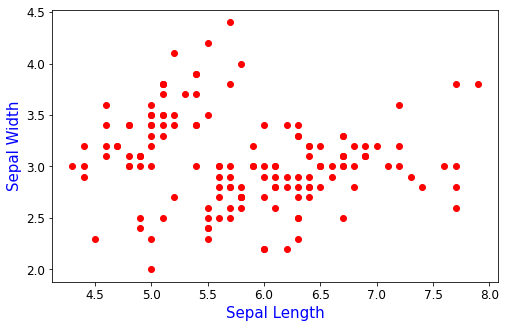

In [117]:
plt.figure(figsize = (8,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Sepal Length", size=15, color = 'b')
plt.ylabel("Sepal Width", size=15, color = 'b')
plt.scatter(x,y,color='r')
plt.show()

In [118]:
train, test = train_test_split(file, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [147]:
train_x = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
train_y = train.Species

test_x = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [122]:
train_x.shape

(112, 4)

In [123]:
test_x.shape

(38, 4)

In [124]:
train_y.shape

(112,)

In [125]:
test_y.shape

(38,)

In [180]:
from sklearn.linear_model import LogisticRegression

In [179]:
lr = LogisticRegression()
lr.fit(train_x, train_y)
prediction = lr.predict(test_x)
accuracy_score(prediction,test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1.0

#***RESULTS OF THE CLASSIFICATIONS:***

In [184]:
results = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree', 'k-Nearest-Neighbors'],
    'Score': [1.0, 0.9, 1.0]})
df = results.sort_values(by='Score', ascending=False)
df = df.set_index('Model')
df

,Score
Model,
Logistic Regression,1.0
k-Nearest-Neighbors,1.0
Decision Tree,0.9
